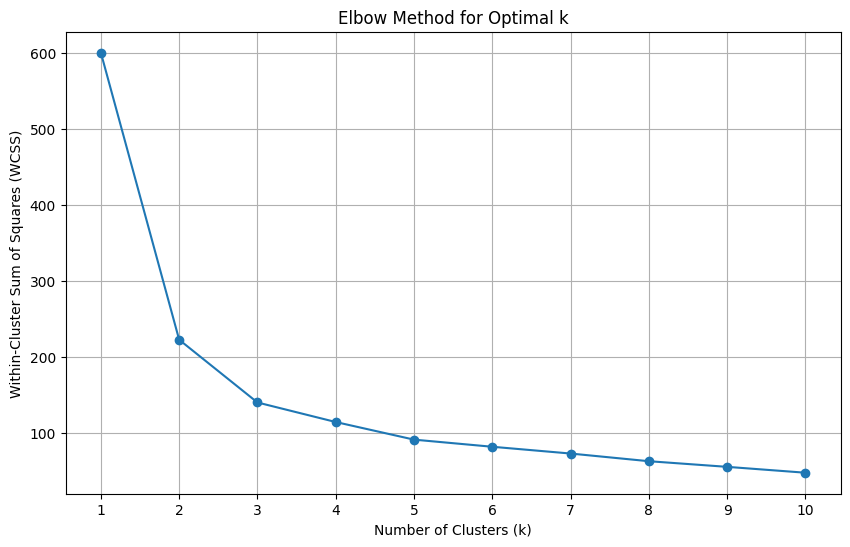

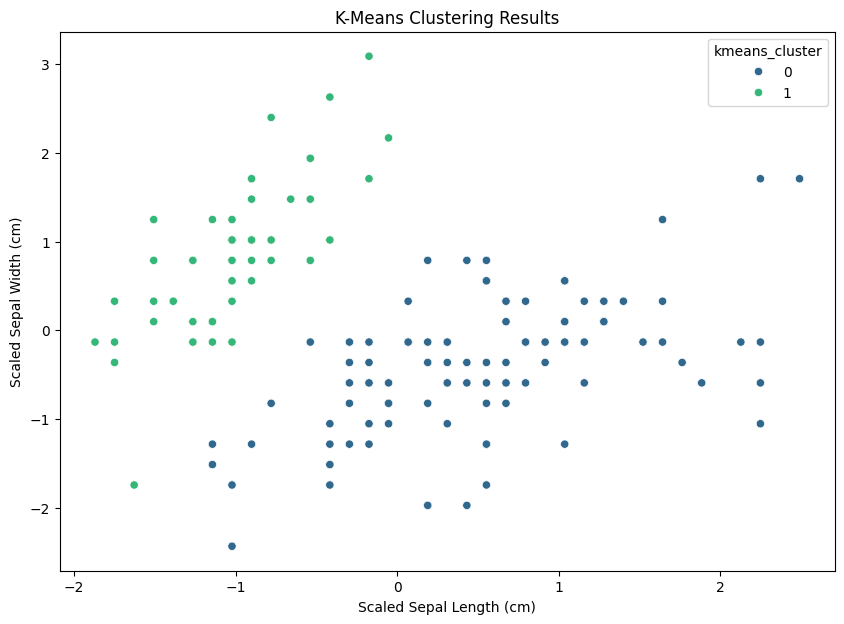

The average Silhouette Score for the clustering is: 0.5818


In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
df['kmeans_cluster'] = cluster_labels

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['kmeans_cluster'], palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Scaled Sepal Length (cm)')
plt.ylabel('Scaled Sepal Width (cm)')
plt.show()

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"The average Silhouette Score for the clustering is: {silhouette_avg:.4f}")
